In [234]:
import pandas as pd
import numpy as np
import geopandas as gpd

import networkx as nx
import osmnx as ox

import matplotlib.pyplot as plt

In [235]:
# grab the street network for our area of interest
G = ox.graph.graph_from_place('Borough of Havering, London, UK', network_type='walk')

In [236]:
# get the administrative boundary of the area
area = ox.geocode_to_gdf('Borough of Havering, London, UK')

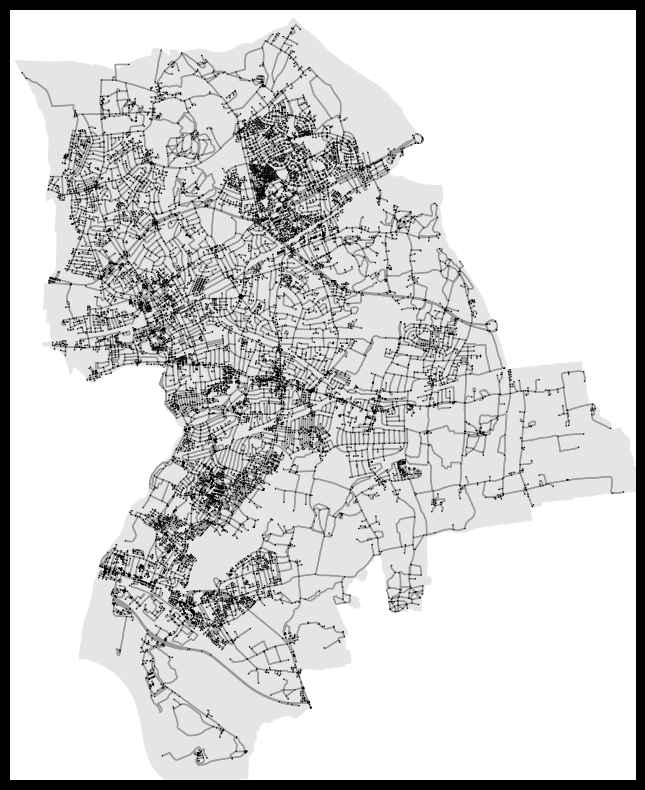

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [237]:
# plot the network on the area
fig, ax = plt.subplots(figsize=(10, 10),facecolor='k')
area.plot(ax=ax, facecolor='k', alpha=0.1)
ox.plot_graph(G, ax=ax, node_color='k', node_size=1)

In [238]:
retail = pd.read_csv("../Datasets/geolytix_retailpoints_v34_202412.csv")
retail = gpd.GeoDataFrame(retail, geometry=gpd.points_from_xy(retail['long_wgs'], retail['lat_wgs']), crs="EPSG:4326")
retail = retail[retail['geometry'].within(area.loc[0, 'geometry'])]
retail.head()

,id,retailer,fascia,store_name,add_one,add_two,town,suburb,postcode,long_wgs,lat_wgs,bng_e,bng_n,pqi,open_date,size_band,county,geometry
8880,1010001769,Marks and Spencer,Marks and Spencer BP,M&S Hornchurch BP,Southend Arterial Road,NaN,London,Emerson Park,RM11 3UJ,0.240395,51.579830,555332.371570,189152.128284,Rooftop,NaN,"< 3,013 ft2 (280m2)",Greater London,POINT (0.2404 51.57983)
8881,1010000785,Asda,Asda Superstore,Asda Romford Superstore,Dolphin Approach,Mercury Gardens,London,Romford,RM1 3EE,0.185560,51.579473,551534.511561,188997.348277,Rooftop,NaN,"30,138 ft2 > (2,800 m2)",Greater London,POINT (0.18556 51.57947)
8882,1010008077,The Co-operative Group,The Co-operative Food,Co-op Harold Wood,15 Station Road,Harold Wood,London,Harold Wood,RM3 0BP,0.233400,51.593581,554801.026269,190666.388789,Rooftop,NaN,"< 3,013 ft2 (280m2)",Greater London,POINT (0.2334 51.59358)
8883,1010011531,Chelmsford Star Co-operative Society,The Co-operative Food,Co-op Mungo Park,150 Mungo Park Road,NaN,London,Elm Park,RM13 7PP,0.192236,51.540285,552127.681563,184653.568262,Rooftop,NaN,"< 3,013 ft2 (280m2)",Greater London,POINT (0.19224 51.54028)
8884,1010014460,The Southern Co-operative,The Co-operative Food,Co-op Hornchurch - Hornchurch Road,176-178 Hornchurch Road,NaN,London,Heath Park,RM11 1QL,0.200812,51.564993,552639.622492,187418.963916,Rooftop,20179999.0,"< 3,013 ft2 (280m2)",Greater London,POINT (0.20081 51.56499)


In [239]:
# extract the area of the supermarkets as the attraction factor.
import re
def extract_square_meter(x):
    # match the square meter value, even if there is a range
    match = re.search(r'\((\d{1,3}(?:,\d{3})*)\s*(?:<\s*\d{1,3}(?:,\d{3})*)?\s*m2\)', x)
    if match:
        # extract the first value in the range, or the single value
        square_meter_str = match.group(1).replace(",", "")
        return int(square_meter_str)
    return None

retail['square_meters'] = retail['size_band'].apply(lambda x: extract_square_meter(x))
retail.head()


,id,retailer,fascia,store_name,add_one,add_two,town,suburb,postcode,long_wgs,lat_wgs,bng_e,bng_n,pqi,open_date,size_band,county,geometry,square_meters
8880,1010001769,Marks and Spencer,Marks and Spencer BP,M&S Hornchurch BP,Southend Arterial Road,NaN,London,Emerson Park,RM11 3UJ,0.240395,51.579830,555332.371570,189152.128284,Rooftop,NaN,"< 3,013 ft2 (280m2)",Greater London,POINT (0.2404 51.57983),280
8881,1010000785,Asda,Asda Superstore,Asda Romford Superstore,Dolphin Approach,Mercury Gardens,London,Romford,RM1 3EE,0.185560,51.579473,551534.511561,188997.348277,Rooftop,NaN,"30,138 ft2 > (2,800 m2)",Greater London,POINT (0.18556 51.57947),2800
8882,1010008077,The Co-operative Group,The Co-operative Food,Co-op Harold Wood,15 Station Road,Harold Wood,London,Harold Wood,RM3 0BP,0.233400,51.593581,554801.026269,190666.388789,Rooftop,NaN,"< 3,013 ft2 (280m2)",Greater London,POINT (0.2334 51.59358),280
8883,1010011531,Chelmsford Star Co-operative Society,The Co-operative Food,Co-op Mungo Park,150 Mungo Park Road,NaN,London,Elm Park,RM13 7PP,0.192236,51.540285,552127.681563,184653.568262,Rooftop,NaN,"< 3,013 ft2 (280m2)",Greater London,POINT (0.19224 51.54028),280
8884,1010014460,The Southern Co-operative,The Co-operative Food,Co-op Hornchurch - Hornchurch Road,176-178 Hornchurch Road,NaN,London,Heath Park,RM11 1QL,0.200812,51.564993,552639.622492,187418.963916,Rooftop,20179999.0,"< 3,013 ft2 (280m2)",Greater London,POINT (0.20081 51.56499),280


In [240]:
nodes, edges = ox.graph_to_gdfs(G)

Text(0.5, 1.0, 'Retail locations in Havering, London')

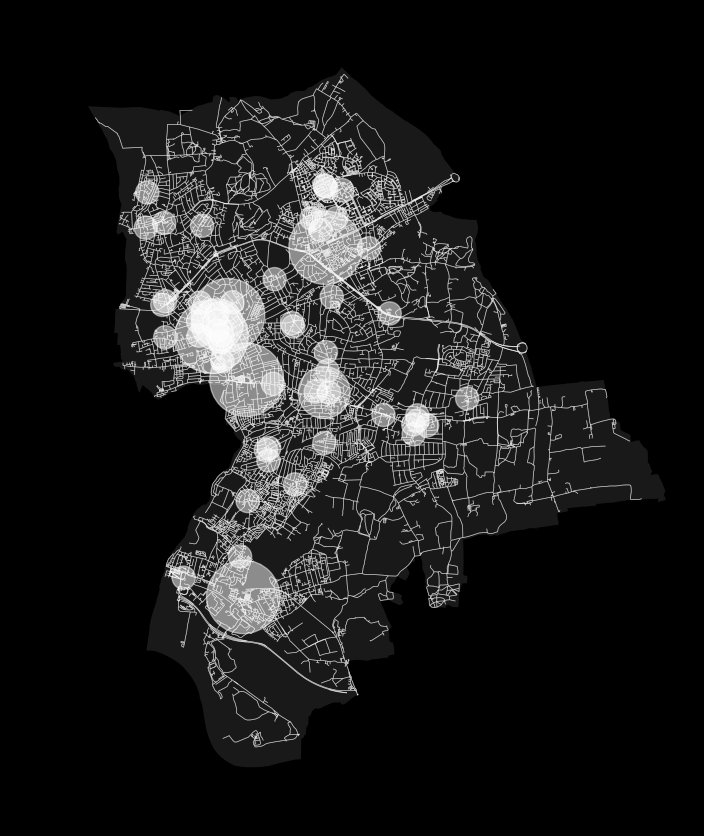

In [291]:
# plot the supermarkets according to their size 
fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')
area.plot(ax=ax, facecolor='w', alpha=0.1)
edges.plot(color='w', ax=ax, linewidth=0.5, alpha=0.5)
retail.plot(color='w', ax=ax, markersize='square_meters', alpha=0.5)
ax.set_facecolor('k')
ax.set_title('Retail locations in Havering, London')

In [242]:
retail = retail.sort_values('square_meters', ascending=False)
retail.head()

,id,retailer,fascia,store_name,add_one,add_two,town,suburb,postcode,long_wgs,lat_wgs,bng_e,bng_n,pqi,open_date,size_band,county,geometry,square_meters
8881,1010000785,Asda,Asda Superstore,Asda Romford Superstore,Dolphin Approach,Mercury Gardens,London,Romford,RM1 3EE,0.185560,51.579473,551534.511561,188997.348277,Rooftop,NaN,"30,138 ft2 > (2,800 m2)",Greater London,POINT (0.18556 51.57947),2800
8896,1010006290,Tesco,Tesco Extra,Tesco Romford Gallows Corner Extra,Bryant Avenue,Romford,London,Harold Wood,RM3 0LL,0.218663,51.593686,553780.001567,190646.998287,Rooftop,NaN,"30,138 ft2 > (2,800 m2)",Greater London,POINT (0.21866 51.59369),2800
8897,1010006288,Tesco,Tesco Extra,Tesco Rainham Extra,Bridge Road,Rainham,London,Rainham,RM13 9YZ,0.190737,51.520074,552091.001563,182402.998253,Rooftop,NaN,"30,138 ft2 > (2,800 m2)",Greater London,POINT (0.19074 51.52007),2800
8910,1010003189,Sainsburys,Sainsburys,Sainsburys Romford,1 The Brewery,NaN,London,Romford,RM1 1AU,0.179965,51.574915,551162.001560,188478.998274,Rooftop,NaN,"30,138 ft2 > (2,800 m2)",Greater London,POINT (0.17997 51.57492),2800
18264,1010006287,Tesco,Tesco Extra,Tesco Romford Extra,300 Hornchurch Road,Hornchurch,London,Heath Park,RM11 1PY,0.191840,51.565854,552015.001562,187495.998272,Rooftop,NaN,"30,138 ft2 > (2,800 m2)",Greater London,POINT (0.19184 51.56585),2800


In [243]:
retail['nodes'] = ox.nearest_nodes(G, retail['long_wgs'], retail['lat_wgs'])

# Each supermarket gets associated with a node (intersection point in the network)
retail['nodes'].to_numpy()

array([   33472352,  1723271155,  3126695258,  2905549031,  4525271306,
        7097574945,    31073549,    31388110,   245035059,    30991535,
        8091496508,  6769246246,   747087748,  6322924734,  4520240128,
        8205579182,  1266089657,  3565590107,    45403833,    32567383,
         245037871,  8628074642,  4472253157,  5380508003,  2733299480,
        2962708960, 12726019370, 11599007720,    27340030, 11132894624,
        3787358413,  6970755181,  3232129350, 11227619384,   245794863,
       11909545221,    31497656,    30865750,   747087848,    25894895,
        5865912846,  5385551038,  6322924734,  7261100452,  6332783669,
        2184904585,  1567651769,  2142099759,    31387232,  8209435887,
        8817642959,  1127943270,   245015254, 10749201507, 12670836514,
        7265453259])

In [244]:
# get the administrative units: OAs and take only the area defined
oa = gpd.read_file("../Geo_Datasets/loac_OA.gpkg")
oa = oa.to_crs(4326)
oa = oa[oa['geometry'].centroid.within(area.loc[0, 'geometry'])]
oa.head()

C:\Users\wbwha\AppData\Local\Temp\ipykernel_19816\2773708545.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  oa = oa[oa['geometry'].centroid.within(area.loc[0, 'geometry'])]


,OA21CD,G,SG,geometry
10547,E00011202,F2,F,"MULTIPOLYGON (((0.1515 51.56798, 0.15078 51.56..."
10548,E00011203,C2,C,"MULTIPOLYGON (((0.1761 51.56765, 0.17639 51.56..."
10549,E00011204,F1,F,"MULTIPOLYGON (((0.16157 51.57077, 0.16293 51.5..."
10550,E00011205,C2,C,"MULTIPOLYGON (((0.18129 51.56826, 0.18303 51.5..."
10551,E00011206,F1,F,"MULTIPOLYGON (((0.18693 51.56557, 0.18621 51.5..."


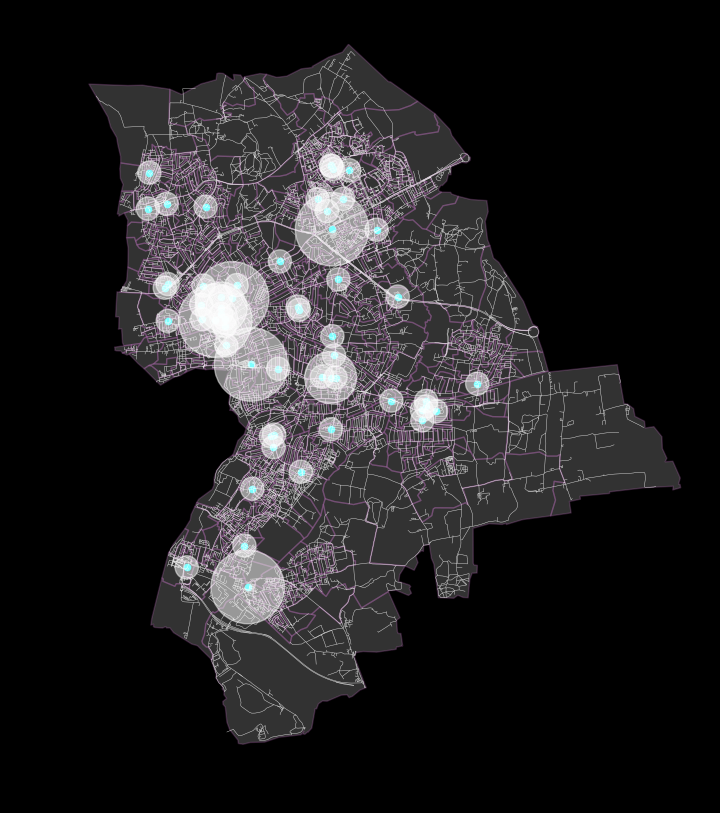

In [292]:
# plot the nodes represent each supermarkets
fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')
oa.plot(ax=ax, facecolor='w', alpha=0.2,edgecolor='violet', linewidth=1)
edges.plot(color='w', ax=ax, linewidth=0.3, alpha=0.5)
retail.plot(color='cyan', ax=ax, markersize=20)
retail.plot(color='w', ax=ax, markersize='square_meters', alpha=0.5)
ax.set_facecolor('k')

In [246]:
oa_ids = ['E00011326', 'E00011710']  # get the actual OA IDs of potienal supermarket
selected_oas = oa[oa['OA21CD'].isin(oa_ids)]

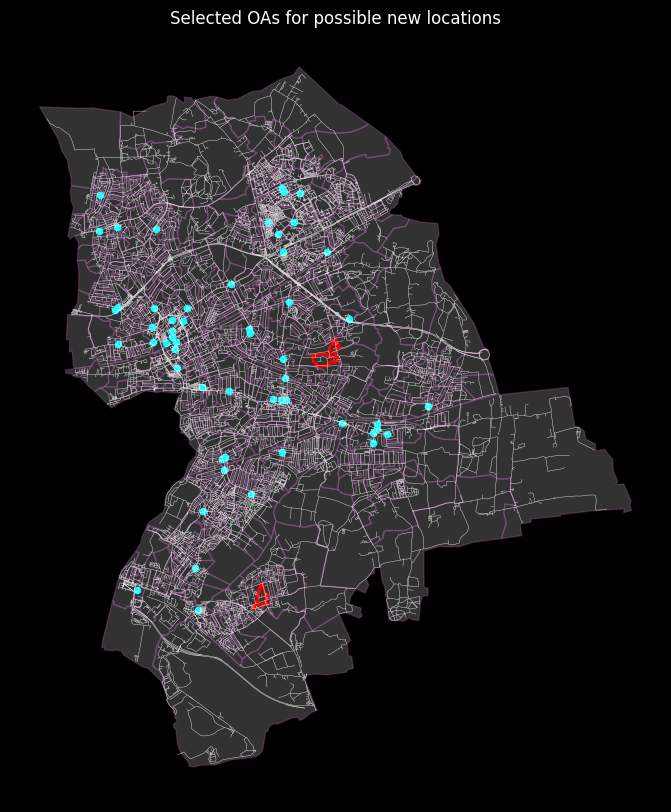

In [247]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')

# plot all OAs
oa.plot(ax=ax, facecolor='w', alpha=0.2, edgecolor='violet', linewidth=1)

# plot roads: edges
edges.plot(ax=ax, color='w', linewidth=0.3, alpha=0.5)

# plot retail locations
retail.plot(ax=ax, color='cyan', markersize=20)

# plot selected OAs on top — highlighted in red
selected_oas.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

# set background
ax.set_facecolor('k')
ax.set_title("Selected OAs for possible new locations", color='white')

# turn off axis
ax.axis('off')

plt.show()

In [248]:
# take the centroid of each area and compute the distance
oa['lon'] = oa['geometry'].centroid.x
oa['lat'] = oa['geometry'].centroid.y

C:\Users\wbwha\AppData\Local\Temp\ipykernel_19816\1085420145.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  oa['lon'] = oa['geometry'].centroid.x
C:\Users\wbwha\AppData\Local\Temp\ipykernel_19816\1085420145.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  oa['lat'] = oa['geometry'].centroid.y


In [249]:
# join the centroids to its closest node
oa['nodes'] = ox.nearest_nodes(G, oa['lon'], oa['lat'])

In [250]:
selected_oas_ = oa[oa['OA21CD'].isin(oa_ids)]

selected_nodes_ids=selected_oas_['nodes'].values

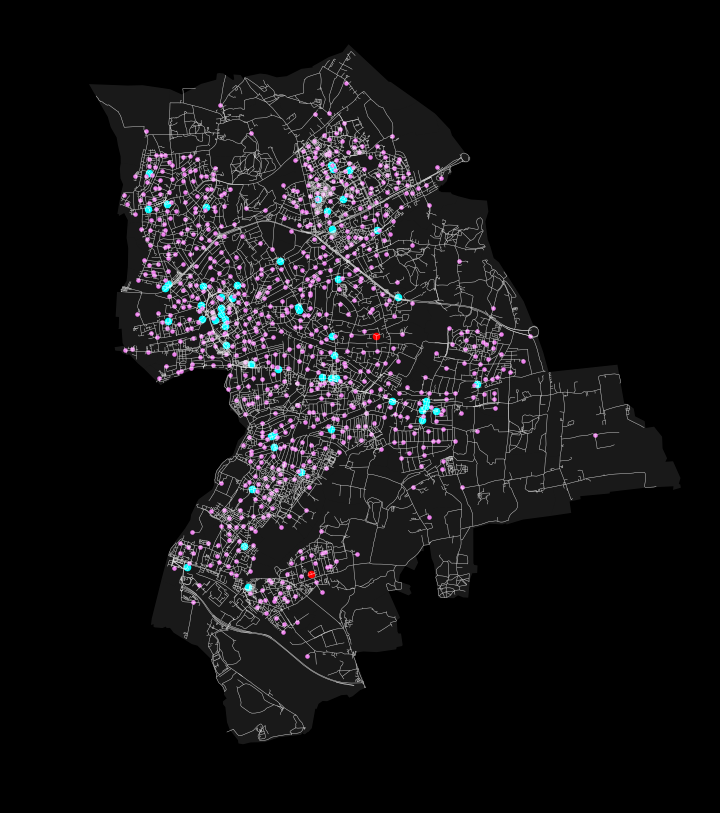

In [251]:
# plot the centroids in the map
oa_centroids = nodes.loc[oa['nodes'].unique()]
selected_nodes= nodes.loc[selected_nodes_ids]
fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')
oa.plot(ax=ax, facecolor='w', alpha=0.1)
edges.plot(color='w', ax=ax, linewidth=0.3, alpha=0.5)
retail.plot(color='cyan', ax=ax, markersize=20)
oa_centroids.plot(ax=ax, color='violet', markersize=5)
selected_nodes.plot(ax=ax, color='red', markersize=20)
ax.set_facecolor('k')
plt.show()

In [252]:
# get origin and destination node lists

# origin nodes from all OA centroids
origin_nodes = oa['nodes'].values

In [253]:
# combine all destination nodes: retail + the 2 selected OAs
destination_nodes = list(retail['nodes'].values) + list(selected_nodes_ids)

In [254]:
# compute the distance matrix

# create an empty distance matrix
distance_matrix = pd.DataFrame(index=origin_nodes, columns=destination_nodes)

# compute shortest path lengths
for origin in origin_nodes:
    lengths = nx.single_source_dijkstra_path_length(G, origin, weight='length')
    for dest in destination_nodes:
        distance_matrix.loc[origin, dest] = lengths.get(dest, float('inf'))  # 'inf' if no path

In [255]:
# add OA21CD as index labels
distance_matrix.index = oa['OA21CD'].values

# label destination columns: retail + selected OAs
retail_labels = retail['id'].astype(str).values  # ensures strings
selected_labels = oa_ids
distance_matrix.columns = list(retail_labels) + selected_labels

In [256]:
distance_matrix

,1010000785,1010006290,1010006288,1010003189,1010006287,1010003188,1010001545,1010014460,1010015875,1010021160,...,1010005536,1010010917,1010006466,1010010912,1010010914,1010005546,1010015744,1010005537,E00011326,E00011710
E00011202,3275.920817,6811.884116,11960.957617,2632.983056,3064.559186,4950.703467,2914.283756,3717.668936,2472.94323,7364.849689,...,2785.014763,5101.503637,5069.885961,3173.562373,1586.765886,4279.543874,4233.530658,4997.127201,6190.720499,11355.986259
E00011203,2008.770715,5532.309332,10244.603901,1365.832954,1355.96335,3242.107631,1647.133654,2009.0731,1410.886391,5656.253854,...,1517.864661,3392.907802,4400.239874,1906.412271,2069.502519,2999.96909,2953.955874,3280.773485,4911.145716,9647.390423
E00011204,2880.845316,6416.808615,11565.882116,2237.907556,2669.483685,4555.627966,2519.208256,3322.593435,2077.867729,6969.774189,...,2389.939263,4706.428137,4674.810461,2778.486872,1191.690385,3884.468373,3838.455157,4602.0517,5795.644999,10960.910758
E00011205,1928.798235,5452.336853,9931.259893,1285.860475,1034.861462,2921.005743,1567.161175,1687.971212,1330.913912,5335.151966,...,1437.892182,3071.805914,4320.267395,1826.439791,2217.091256,2834.486751,2759.707377,2967.429477,4716.897218,9326.288535
E00011206,1897.989118,5141.405583,9400.397873,1462.166093,511.757322,2397.901603,1545.956817,1164.867072,1507.21953,4812.047825,...,1407.083064,2548.701773,4496.573013,1951.118757,2393.396874,2481.909006,2407.129633,2436.567457,4221.396598,8803.184395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00176973,1155.560338,4981.806576,10284.768779,512.622578,1367.676936,3253.821218,793.923278,2020.786686,557.676015,5667.96744,...,664.654285,3404.621388,3547.029498,1053.201894,1443.853359,2449.466334,2416.498776,3320.938363,4373.688617,9659.104009
E00176974,1348.42577,5163.691928,10448.302018,705.48801,1531.210175,3417.354456,986.78871,2184.319925,750.541447,5831.500679,...,857.519717,3568.154627,3739.89493,1246.067326,1636.718791,2631.351686,2585.33847,3484.471602,4542.528311,9822.637248
E00176975,7594.50175,9430.732382,4569.049517,7262.573181,5875.077182,5695.465208,7242.469449,5891.891745,7307.626618,7479.655119,...,7103.595696,5846.265378,10249.197167,7647.631389,8193.803962,7328.572306,7253.792933,4005.128084,7560.797303,6273.456068
E00176979,4782.531545,654.878541,11620.039727,4827.425812,5283.647687,3808.761285,4639.634545,4759.002924,5106.944453,5762.000256,...,4524.994542,3954.499218,5319.880537,4780.02355,5993.121797,2762.058305,2833.829923,5987.896691,3639.394712,10103.77321


In [257]:
# find common elements between index and column names
common_elements = set(distance_matrix.index) & set(distance_matrix.columns)

# output result
if common_elements:
    print(f"Matching elements found: {common_elements}")
else:
    print("No matching elements between index and column names.")

Matching elements found: {'E00011710', 'E00011326'}


In [258]:
print(distance_matrix.loc['E00011326', 'E00011326'])
print(distance_matrix.loc['E00011710', 'E00011710'])

0
0


In [259]:
distance_matrix.loc['E00011326', 'E00011326'] = 1
distance_matrix.loc['E00011710', 'E00011710'] = 1

In [260]:
df_model = distance_matrix.stack().reset_index()
df_model.columns = ['Origin', 'Destination', 'Distance']

In [261]:
df_model

,Origin,Destination,Distance
0,E00011202,1010000785,3275.920817
1,E00011202,1010006290,6811.884116
2,E00011202,1010006288,11960.957617
3,E00011202,1010003189,2632.983056
4,E00011202,1010006287,3064.559186
...,...,...,...
44945,E00176984,1010005546,2294.487925
44946,E00176984,1010015744,2376.13375
44947,E00176984,1010005537,4039.333075
44948,E00176984,E00011326,4426.022642


In [262]:
pop = pd.read_csv("../Datasets/census2021-ts001-oa.csv")

In [263]:
pop_sub = pop.loc[:, ['geography code', 'Residence type: Total; measures: Value']]

In [264]:
df_model = pd.merge(df_model, pop_sub, left_on='Origin', right_on='geography code', how='left')
df_model.drop(columns='geography code', inplace=True)
df_model.rename({'Residence type: Total; measures: Value': 'Population'}, axis=1, inplace=True)

In [265]:
df_model

,Origin,Destination,Distance,Population
0,E00011202,1010000785,3275.920817,435
1,E00011202,1010006290,6811.884116,435
2,E00011202,1010006288,11960.957617,435
3,E00011202,1010003189,2632.983056,435
4,E00011202,1010006287,3064.559186,435
...,...,...,...,...
44945,E00176984,1010005546,2294.487925,293
44946,E00176984,1010015744,2376.13375,293
44947,E00176984,1010005537,4039.333075,293
44948,E00176984,E00011326,4426.022642,293


In [266]:
retail_sub = retail.loc[:, ['id', 'square_meters']]
retail_sub['id'] = retail_sub['id'].astype(str)

In [267]:
df_model = pd.merge(df_model, retail_sub, left_on='Destination', right_on='id', how='left')
df_model.drop(columns='id', inplace=True)
df_model.rename({'square_meters':'Area'}, axis=1, inplace=True)

In [268]:
Average_Area = retail_sub['square_meters'].mean()

df_model.loc[df_model['Destination'] == 'E00011326', 'Area'] = Average_Area
df_model.loc[df_model['Destination'] == 'E00011710', 'Area'] = Average_Area

In [269]:
df_model_transport_increase = df_model.copy()

df_model

,Origin,Destination,Distance,Population,Area
0,E00011202,1010000785,3275.920817,435,2800.0
1,E00011202,1010006290,6811.884116,435,2800.0
2,E00011202,1010006288,11960.957617,435,2800.0
3,E00011202,1010003189,2632.983056,435,2800.0
4,E00011202,1010006287,3064.559186,435,2800.0
...,...,...,...,...,...
44945,E00176984,1010005546,2294.487925,293,280.0
44946,E00176984,1010015744,2376.13375,293,280.0
44947,E00176984,1010005537,4039.333075,293,280.0
44948,E00176984,E00011326,4426.022642,293,545.0


In [270]:
df_model_sub = df_model[(df_model['Destination'] != 'E00011326') & (df_model['Destination'] != 'E00011710')]
df_model_E00011326 = df_model[df_model['Destination'] != 'E00011710']
df_model_E00011710 = df_model[df_model['Destination'] != 'E00011326']

df_model_E00011326_ = df_model_E00011326.copy()
df_model_E00011710_ = df_model_E00011710.copy()

In [271]:
def Production_Constrained_Model(df, gamma=2.0440, beta=2.2140):
    """
    Computes trip distribution using a gravity model.

    Parameters:
    df (pd.DataFrame): Input dataframe containing 'Origin', 'Destination', 'Distance', 'Area', and 'Population'.
    gamma (float): Sensitivity to attraction (default 2.0440).
    beta (float): Sensitivity to distance (default 2.2140).

    Returns:
    pd.DataFrame: Updated dataframe with computed T_ij values.
    """
    
    # avoid division by zero for any zero distances
    df['Distance'] = df['Distance'].replace(0, 1)

    # compute the attraction term: D_j^gamma * d_ij^-beta
    df['attraction_term'] = (df['Area'] ** gamma) * (df['Distance'] ** -beta)

    # group by Origin and compute the sum of attraction terms for each origin
    Ai_df = df.groupby('Origin')['attraction_term'].sum().reset_index()

    # calculate A_i as the inverse of the sum of attraction terms
    Ai_df['A_i'] = 1 / Ai_df['attraction_term']
    Ai_df = Ai_df[['Origin', 'A_i']]  # Keep only needed columns

    # merge A_i back into the original dataframe
    df = df.merge(Ai_df, on='Origin', how='left')

    # compute T_ij: the flow from origin i to destination j
    df['T_ij'] = df['A_i'] * df['Population'] * (df['Area'] ** gamma) * (df['Distance'] ** -beta)

    # check if the sum of flows from each origin equals the origin's population
    check = df.groupby('Origin')['T_ij'].sum().reset_index()
    check = check.merge(df[['Origin', 'Population']].drop_duplicates(), on='Origin')
    check['difference'] = check['T_ij'] - check['Population']

    return df, check

In [272]:
result_basic = Production_Constrained_Model(df_model_sub)

C:\Users\wbwha\AppData\Local\Temp\ipykernel_19816\3471955435.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance'] = df['Distance'].replace(0, 1)
C:\Users\wbwha\AppData\Local\Temp\ipykernel_19816\3471955435.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['attraction_term'] = (df['Area'] ** gamma) * (df['Distance'] ** -beta)


In [273]:
df_model_sub = result_basic[0]
check_basic = result_basic[1]

In [274]:
df_model_sub

,Origin,Destination,Distance,Population,Area,attraction_term,A_i,T_ij
0,E00011202,1010000785,3275.920817,435,2800.0,0.18325,1.153708,91.96614
1,E00011202,1010006290,6811.884116,435,2800.0,0.036236,1.153708,18.185381
2,E00011202,1010006288,11960.957617,435,2800.0,0.010419,1.153708,5.228803
3,E00011202,1010003189,2632.983056,435,2800.0,0.297248,1.153708,149.177761
4,E00011202,1010006287,3064.559186,435,2800.0,0.212409,1.153708,106.600028
...,...,...,...,...,...,...,...,...
43395,E00176984,1010010912,174.330246,293,280.0,1.095448,0.022808,7.320731
43396,E00176984,1010010914,1489.54874,293,280.0,0.009481,0.022808,0.063359
43397,E00176984,1010005546,2294.487925,293,280.0,0.003643,0.022808,0.024344
43398,E00176984,1010015744,2376.13375,293,280.0,0.003371,0.022808,0.022531


In [275]:
result_E00011326 = Production_Constrained_Model(df_model_E00011326)

df_model_E00011326 = result_E00011326[0]
check_E00011326 = result_E00011326[1]

C:\Users\wbwha\AppData\Local\Temp\ipykernel_19816\3471955435.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance'] = df['Distance'].replace(0, 1)
C:\Users\wbwha\AppData\Local\Temp\ipykernel_19816\3471955435.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['attraction_term'] = (df['Area'] ** gamma) * (df['Distance'] ** -beta)


In [276]:
check_E00011326

,Origin,T_ij,Population,difference
0,E00011202,435.0,435,-0.0
1,E00011203,326.0,326,-0.0
2,E00011204,326.0,326,-0.0
3,E00011205,376.0,376,0.0
4,E00011206,567.0,567,0.0
...,...,...,...,...
770,E00176973,544.0,544,-0.0
771,E00176974,506.0,506,0.0
772,E00176975,197.0,197,0.0
773,E00176979,413.0,413,0.0


In [277]:
result_E00011710 = Production_Constrained_Model(df_model_E00011710)

df_model_E00011710 = result_E00011710[0]
check_E00011710 = result_E00011710[1]

C:\Users\wbwha\AppData\Local\Temp\ipykernel_19816\3471955435.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance'] = df['Distance'].replace(0, 1)
C:\Users\wbwha\AppData\Local\Temp\ipykernel_19816\3471955435.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['attraction_term'] = (df['Area'] ** gamma) * (df['Distance'] ** -beta)


In [278]:
check_E00011710

,Origin,T_ij,Population,difference
0,E00011202,435.0,435,-0.0
1,E00011203,326.0,326,-0.0
2,E00011204,326.0,326,-0.0
3,E00011205,376.0,376,0.0
4,E00011206,567.0,567,-0.0
...,...,...,...,...
770,E00176973,544.0,544,-0.0
771,E00176974,506.0,506,0.0
772,E00176975,197.0,197,0.0
773,E00176979,413.0,413,0.0


In [279]:
# calculate potential customer flow for two supermarket locations
Flow_E00011326 = round(df_model_E00011326.loc[df_model_E00011326['Destination'] == 'E00011326', 'T_ij'].sum())
Flow_E00011710 = round(df_model_E00011710.loc[df_model_E00011710['Destination'] == 'E00011710', 'T_ij'].sum())

# print all results first
print(f"Estimated customer flow for E00011326: {Flow_E00011326}")
print(f"Estimated customer flow for E00011710: {Flow_E00011710}")

# compare and determine the better location
if Flow_E00011326 > Flow_E00011710:
    print("Location E00011326 is better, with a higher estimated customer count.")
elif Flow_E00011710 > Flow_E00011326:
    print("Location E00011710 is better, with a higher estimated customer count.")
else:
    print("Both locations have the same estimated customer count.")

Estimated customer flow for E00011326: 2569
Estimated customer flow for E00011710: 2021
Location E00011326 is better, with a higher estimated customer count.


In [280]:
def simulate_tij_vs_beta(dfs_with_labels, gamma, beta_range, reference_beta=None):
    """
    Simulate and plot total T_ij received by selected destinations using their full OD data.

    Parameters:
    - dfs_with_labels: list of tuples [(dest_label, df)], where each df includes full OD data 
      but we only extract T_ij for dest_label
    - gamma: exponent for attractiveness (Area^gamma)
    - beta_range: list or array of beta values to simulate
    - reference_beta: optional beta value to mark with vertical line
    """
    import matplotlib.pyplot as plt
    results = {}

    for dest_label, df in dfs_with_labels:
        tij_list = []

        for beta in beta_range:
            df['attraction'] = (df['Area'] ** gamma) * (df['Distance'] ** -beta)
            df['Ai'] = 1 / df.groupby('Origin')['attraction'].transform('sum')
            df['T_ij'] = df['Ai'] * df['Population'] * df['attraction']

            # Only sum flows to the specified destination
            total_flow = df[df['Destination'] == dest_label]['T_ij'].sum()
            tij_list.append(total_flow)

        results[dest_label] = tij_list

    # Plotting
    plt.figure(figsize=(10, 6))
    for dest_label, tij_list in results.items():
        plt.plot(beta_range, tij_list, label=f"To {dest_label}", marker='o')

    if reference_beta:
        ymax = max(max(vals) for vals in results.values())
        plt.axvline(x=reference_beta, color='gray', linestyle=':', linewidth=2)
        plt.text(reference_beta + 0.02, ymax * 0.95, f'β = {reference_beta}', color='gray')

    plt.xlabel("Beta (distance decay parameter)")
    plt.ylabel("Total T_ij (to destination)")
    plt.title("Impact of Beta on T_ij to Selected Destinations")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

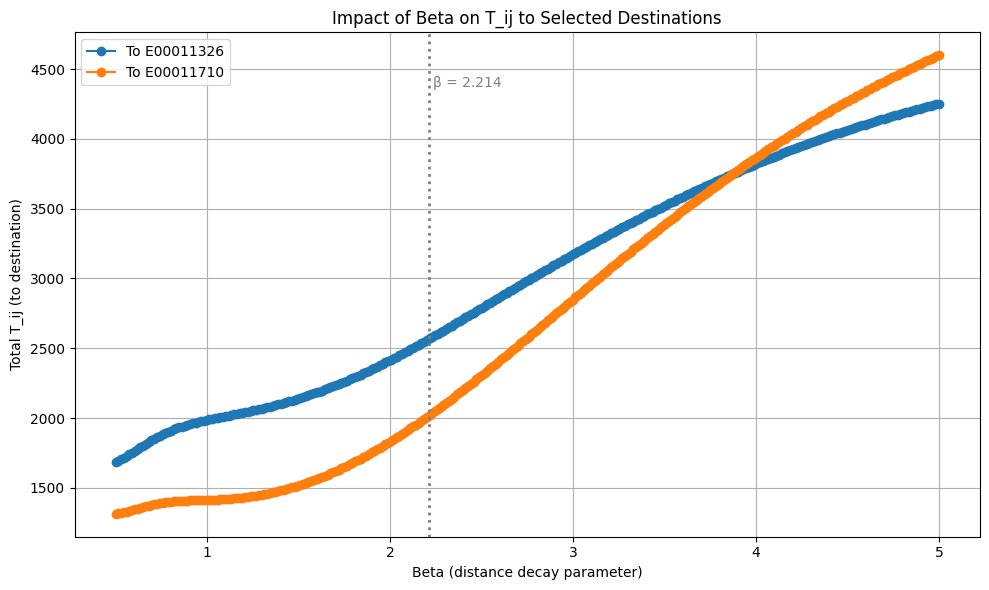

In [281]:
simulate_tij_vs_beta(dfs_with_labels=[('E00011326', df_model_E00011326_),  ('E00011710', df_model_E00011710_)],
                     gamma=2.0440, 
                     beta_range=np.linspace(0.5, 5.0, 300), 
                     reference_beta=2.2140)

In [282]:
oa = pd.merge(oa, pop_sub, left_on='OA21CD', right_on='geography code', how='left')
oa.drop(columns='geography code', inplace=True)
oa.rename({'Residence type: Total; measures: Value': 'Population'}, axis=1, inplace=True)

In [283]:
oa

,OA21CD,G,SG,geometry,lon,lat,nodes,Population
0,E00011202,F2,F,"MULTIPOLYGON (((0.1515 51.56798, 0.15078 51.56...",0.152607,51.568958,691436925,435
1,E00011203,C2,C,"MULTIPOLYGON (((0.1761 51.56765, 0.17639 51.56...",0.175162,51.566831,177734560,326
2,E00011204,F1,F,"MULTIPOLYGON (((0.16157 51.57077, 0.16293 51.5...",0.157491,51.568243,5219365188,326
3,E00011205,C2,C,"MULTIPOLYGON (((0.18129 51.56826, 0.18303 51.5...",0.179297,51.567164,1429395187,376
4,E00011206,F1,F,"MULTIPOLYGON (((0.18693 51.56557, 0.18621 51.5...",0.183873,51.565608,31386337,567
...,...,...,...,...,...,...,...,...
770,E00176973,E2,E,"MULTIPOLYGON (((0.18008 51.57209, 0.18039 51.5...",0.178808,51.572601,10282603620,544
771,E00176974,D1,D,"MULTIPOLYGON (((0.18039 51.57172, 0.18032 51.5...",0.178890,51.571262,5151949179,506
772,E00176975,F1,F,"MULTIPOLYGON (((0.1868 51.52204, 0.18703 51.52...",0.187803,51.522940,12003524846,197
773,E00176979,B1,B,"MULTIPOLYGON (((0.22519 51.59008, 0.22461 51.5...",0.224739,51.590748,4692424677,413


In [284]:
# set walking parameters
walk_speed_m_per_min = 72
time_limit_min = 15
walk_radius = walk_speed_m_per_min * time_limit_min  # ≈ 1250 meters

# build lookup set of all retail osmid
retail_nodes = set(retail['nodes'])

# for each OA node, check if any retail node is reachable within 1250m
accessible_oa = []

for _, row in oa.iterrows():
    oa_node = row['nodes']
    population = row['Population']
    oa_id = row.get('OA21CD', None)

    # build subgraph of all nodes reachable from this OA node within walk_radius
    try:
        subgraph = nx.ego_graph(G, oa_node, radius=walk_radius, distance='length')
        reachable_nodes = set(subgraph.nodes)

        # check if any retail node is within reachable nodes
        if reachable_nodes & retail_nodes:
            accessible_oa.append({'OA21CD': oa_id, 'population': population, 'accessible': True})
        else:
            accessible_oa.append({'OA21CD': oa_id, 'population': population, 'accessible': False})
    except:
        # if the node doesn't exist in G (edge case)
        accessible_oa.append({'OA21CD': oa_id, 'population': population, 'accessible': False})

# convert to DataFrame and summarize
access_df = pd.DataFrame(accessible_oa)

summary = {
    "Total OAs": len(access_df),
    "OAs with access to ≥1 supermarket": access_df['accessible'].sum(),
    "Total population": access_df['population'].sum(),
    "Covered population": access_df.loc[access_df['accessible'], 'population'].sum(),
    "Uncovered population": access_df.loc[~access_df['accessible'], 'population'].sum()
}

print(pd.DataFrame.from_dict(summary, orient='index', columns=['Value']))

                                    Value
Total OAs                             775
OAs with access to ≥1 supermarket     590
Total population                   262051
Covered population                 198931
Uncovered population                63120


In [285]:
type(retail)

geopandas.geodataframe.GeoDataFrame

In [286]:
access_df

,OA21CD,population,accessible
0,E00011202,435,False
1,E00011203,326,True
2,E00011204,326,False
3,E00011205,376,True
4,E00011206,567,True
...,...,...,...
770,E00176973,544,True
771,E00176974,506,True
772,E00176975,197,False
773,E00176979,413,True


In [287]:
oa_15min = pd.merge(oa, access_df, on='OA21CD', how='left')

In [288]:
oa_15min = oa_15min[oa_15min['accessible'] == True]

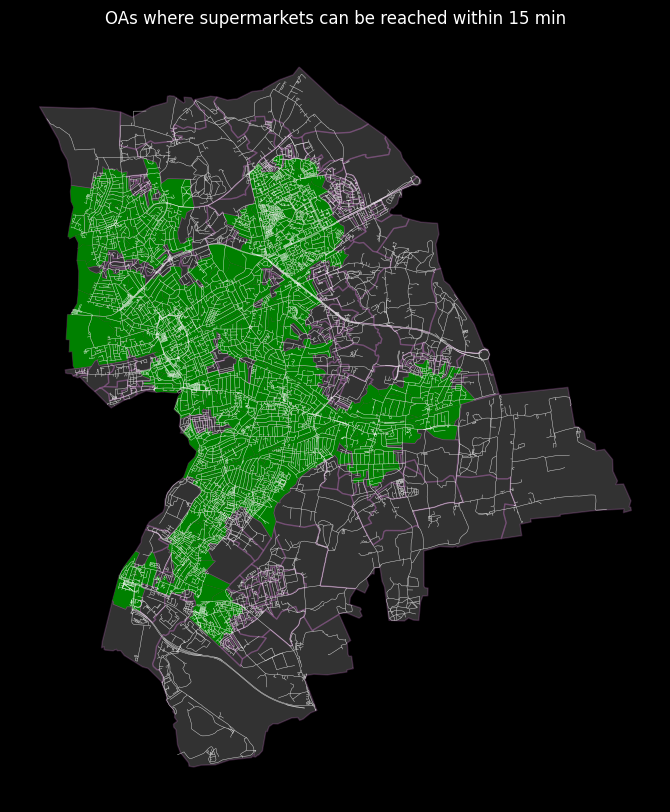

In [289]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')

# plot all OAs
oa.plot(ax=ax, facecolor='w', alpha=0.2, edgecolor='violet', linewidth=1)

# plot roads: edges
edges.plot(ax=ax, color='w', linewidth=0.3, alpha=0.5)

# plot selected OAs which could reach a supermarket within 15 min — highlighted in green
oa_15min.plot(ax=ax, facecolor='green', edgecolor='red', linewidth=0.01)

# set background
ax.set_facecolor('k')
ax.set_title("OAs where supermarkets can be reached within 15 min", color='white')

# turn off axis
ax.axis('off')

plt.show()